# 03 - Market 🛍

You will now apply your knowledge to an example a more practical use case: **market segmentation**.

---

![](https://images.unsplash.com/photo-1511120096-e7744308d1d2?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1050&q=80)

---

The dataset is in the file `Mall_Customers.csv`. The features are quite explicit.

**Q1.** We want now to perform a **market segmentation** based on the information contained in the dataset.

First explore the dataset first, and then perform clustering (optimizing K with the elbow method) to your data.

In order to simplify the problem, start by keeping only the two last columns as features.

In [1]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt

In [4]:
customers = pd.read_csv('Mall_Customers.csv', index_col='CustomerID')

In [5]:
customers

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40
...,...,...,...,...
196,Female,35,120,79
197,Female,45,126,28
198,Male,32,126,74


In [6]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB


In [8]:
customers_simplified = customers.iloc[:,-2:]

In [9]:
customers_simplified

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


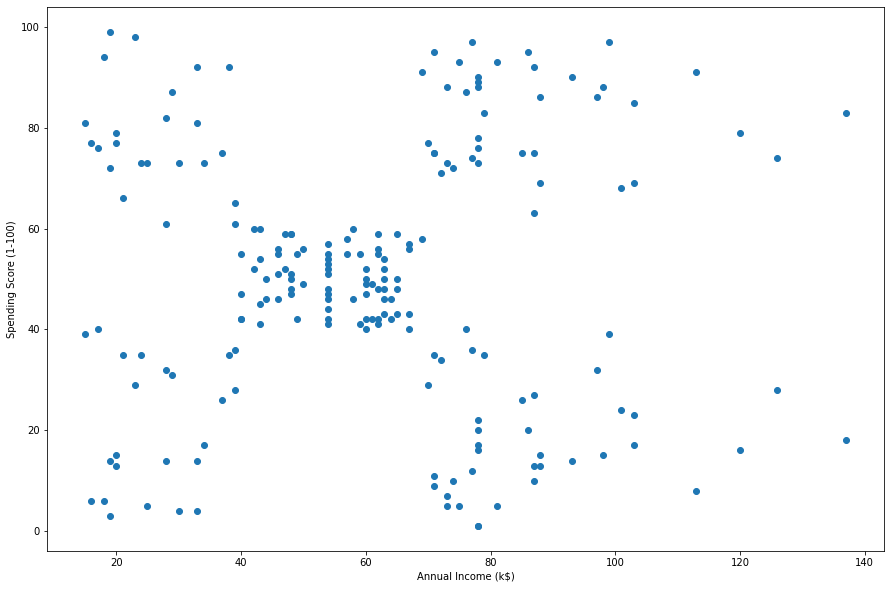

In [13]:
plt.figure(figsize=(15,10))
plt.scatter(customers_simplified['Annual Income (k$)'], customers_simplified['Spending Score (1-100)'])
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

According to the graph above, we could have 5 clusters.

In [14]:
from sklearn.cluster import KMeans

Let's use the elbow method to find the optimal number of clusters.

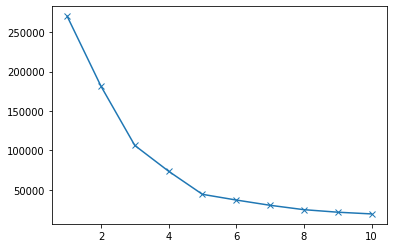

In [15]:
K_lst = np.arange(1,11)
loss = []

for k in K_lst:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customers_simplified)
    loss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(K_lst, loss, marker='x')
plt.show()

K = 5 seems to be our elbow, our optimal value !

Let's now visualize the clusters.

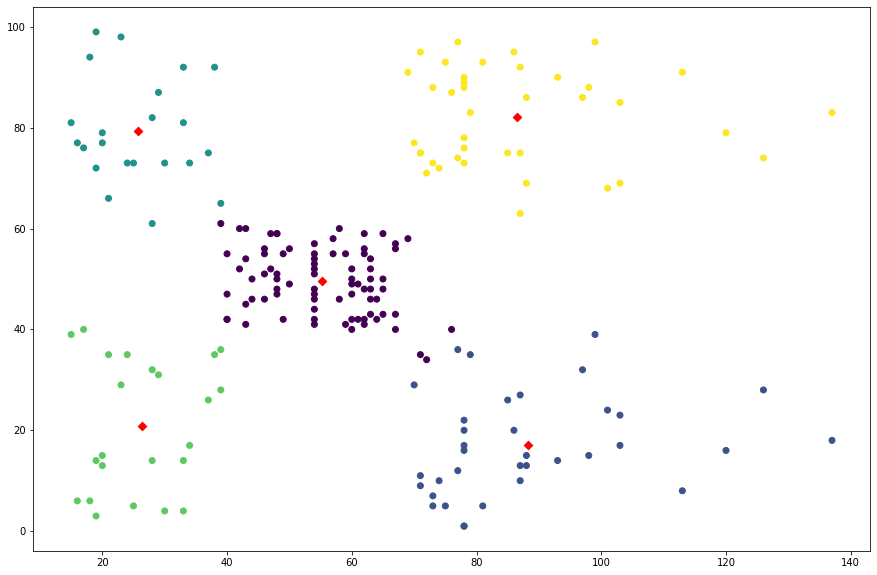

In [19]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(customers_simplified)

plt.figure(figsize=(15,10))

plt.scatter(customers_simplified['Annual Income (k$)'], customers_simplified['Spending Score (1-100)'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], c='red', marker='D')

plt.show()

Results are quite satisfying. Let's check the silhouette scores.

In [21]:
from sklearn.metrics import silhouette_samples

In [22]:
silhouette = silhouette_samples(customers_simplified, kmeans.labels_)

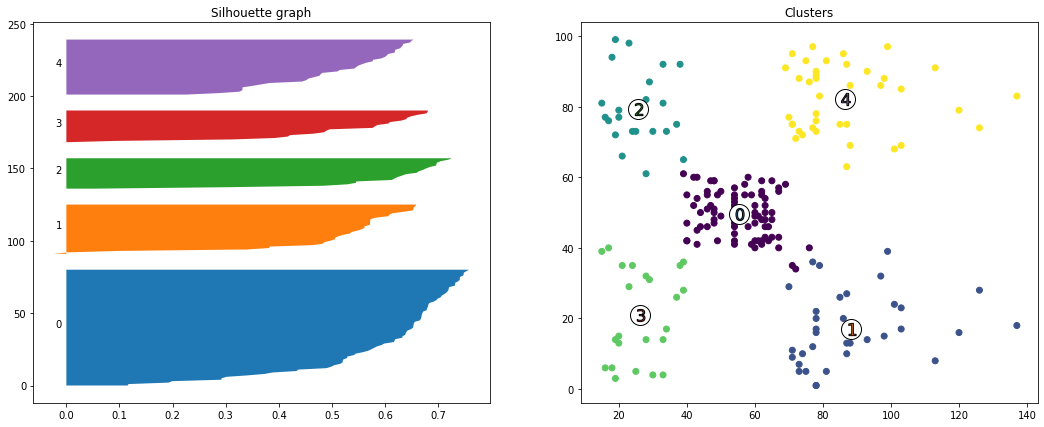

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

# Plot the cluster on the right graph
ax2.scatter(customers_simplified['Annual Income (k$)'], customers_simplified['Spending Score (1-100)'], c=kmeans.labels_)

# Plot the centers white circle
ax2.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='o',
                c="white", alpha=1, s=400, edgecolor='k')

ax2.set_title('Clusters')

y_lower = 0
for i, center in enumerate(kmeans.cluster_centers_):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = silhouette[kmeans.labels_ == i]
    ith_cluster_silhouette_values.sort()
    
    # set width of the  silouhette cluster
    size_cluster_i = ith_cluster_silhouette_values.shape[0] 
    y_upper = y_lower + size_cluster_i

    ax1.fill_betweenx(y=np.arange(y_lower, y_upper), x1=0, x2=ith_cluster_silhouette_values)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.02, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next silouhette cluster plot
    y_lower = y_upper + 10 
    
    # Plot the corresponding cluster number on the right graph
    ax2.scatter(center[0], center[1], marker='$%d$' % i, alpha=1,
                    s=150, edgecolor='k')

ax1.set_title('Silhouette graph')
    
plt.show()

**Q2.** Let's now apply K-means on more than 2 features.

Retrain a clustering model using 3 features that you freely choose.

Visualize the results in a 2-dimension chart.

In [24]:
customers_3 = customers.iloc[:,1:]

In [25]:
customers_3

,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40
...,...,...,...
196,35,120,79
197,45,126,28
198,32,126,74


<IPython.core.display.Javascript object>


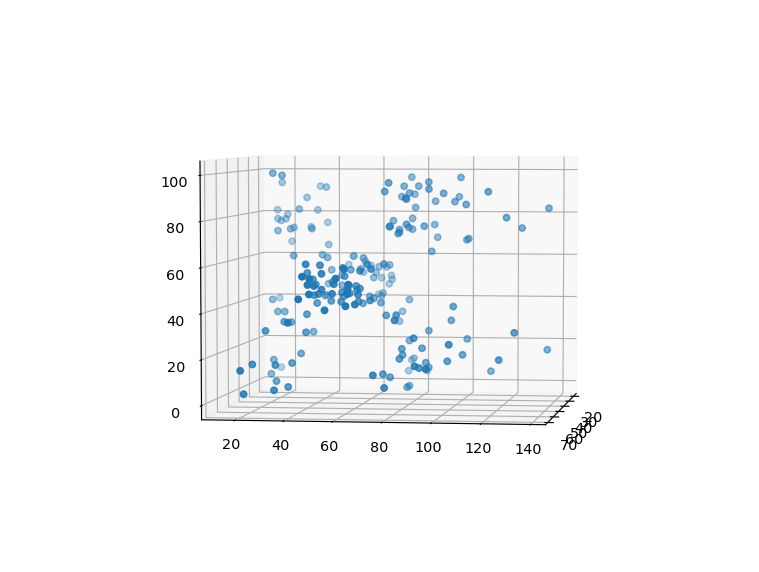

In [28]:
%matplotlib notebook

plt.figure()

ax = plt.subplot(projection='3d')
ax.scatter(customers_3.iloc[:,0], customers_3.iloc[:,1], customers_3.iloc[:,2])

plt.show()

<IPython.core.display.Javascript object>


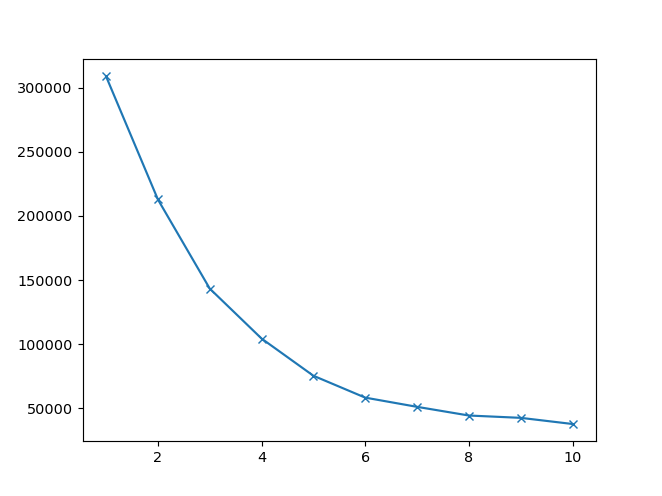

In [30]:
# TODO: Elbow method for choosing optimal K
K_lst = np.arange(1,11)
loss = []

for k in K_lst:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(customers_3)
    loss.append(kmeans.inertia_)
    
plt.figure()
plt.plot(K_lst, loss, marker='x')
plt.show()

In [31]:
kmeans = KMeans(n_clusters=8)
kmeans.fit(customers_3)

KMeans()

<IPython.core.display.Javascript object>


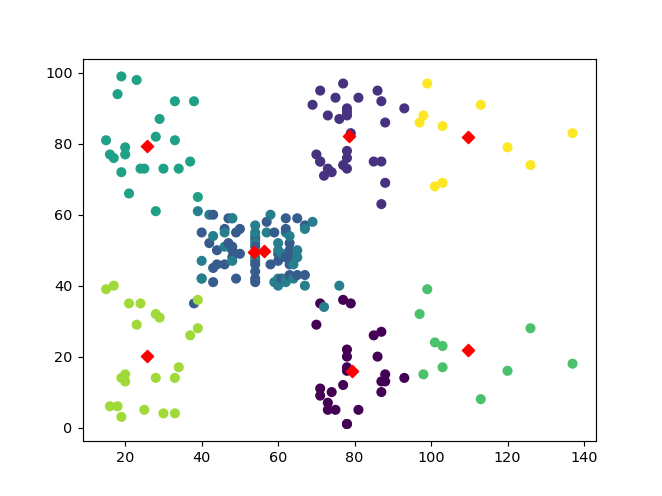

In [37]:
# TODO: K-Means visualization on pair of 2 features (Annual income & Spending Score)
plt.figure()

plt.scatter(customers_3['Annual Income (k$)'], customers_3['Spending Score (1-100)'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', marker='D')

plt.show()

<IPython.core.display.Javascript object>


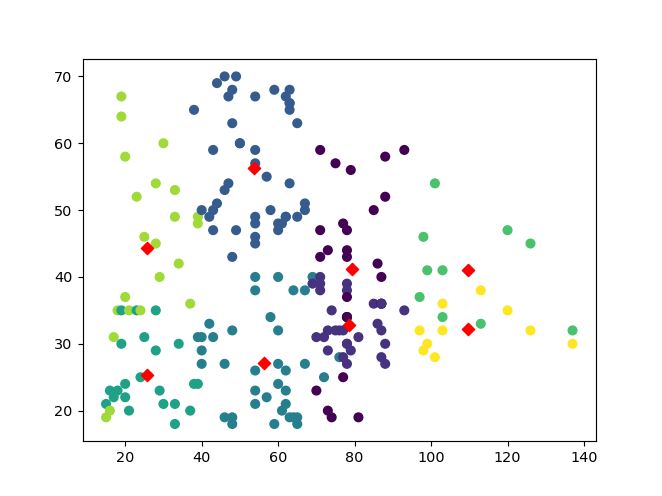

In [40]:
# TODO: K-Means visualization on pair of 2 features (Annual income & Age)
plt.figure()

plt.scatter(customers_3['Annual Income (k$)'], customers_3['Age'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,0], c='red', marker='D')

plt.show()

<IPython.core.display.Javascript object>


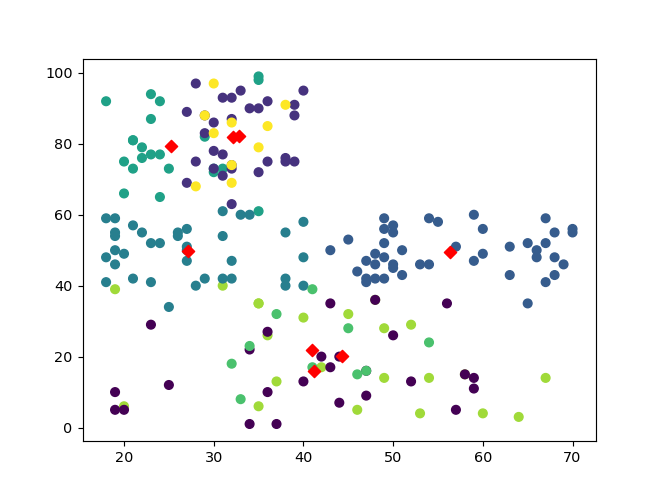

In [39]:
# TODO: K-Means visualization on pair of 2 features (Age & Spending Score)
plt.figure()

plt.scatter(customers_3['Age'], customers_3['Spending Score (1-100)'], c=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,2], c='red', marker='D')

plt.show()

**Q2. [BONUS]** Visualize your clusters in a 3D scatter plot.

<IPython.core.display.Javascript object>


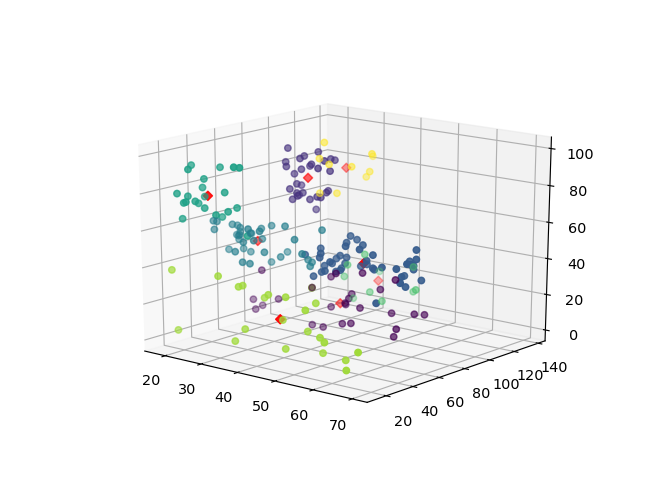

In [43]:
# TODO: 3D visualization
plt.figure()

ax = plt.subplot(projection='3d')

ax.scatter(customers_3['Age'], customers_3['Annual Income (k$)'], customers_3['Spending Score (1-100)'], c=kmeans.labels_)
ax.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], c='red', marker='D')

plt.show()

**Q3.** Define profiles of customers in each of your clusters.

In [29]:
# TODO: Profiles of customers

In [44]:
customers_3.insert(3, 'cluster', kmeans.labels_)

In [45]:
customers_3

,Age,Annual Income (k$),Spending Score (1-100),cluster
CustomerID,,,,
1,19,15,39,6
2,21,15,81,4
3,20,16,6,6
4,23,16,77,4
5,31,17,40,6
...,...,...,...,...
196,35,120,79,7
197,45,126,28,5
198,32,126,74,7


In [47]:
customers_3.groupby('cluster').Age.mean()

cluster
0    41.230769
1    32.862069
2    56.340909
3    27.108108
4    25.272727
5    41.000000
6    44.318182
7    32.200000
Name: Age, dtype: float64

In [48]:
customers_3.groupby('cluster')['Annual Income (k$)'].mean()

cluster
0     79.269231
1     78.551724
2     53.704545
3     56.297297
4     25.727273
5    109.700000
6     25.772727
7    109.700000
Name: Annual Income (k$), dtype: float64

In [49]:
customers_3.groupby('cluster')['Spending Score (1-100)'].mean()

cluster
0    15.923077
1    82.172414
2    49.386364
3    49.675676
4    79.363636
5    22.000000
6    20.272727
7    82.000000
Name: Spending Score (1-100), dtype: float64

- **Cluster 0** : Middle age and quite rich people who spend few
- **Cluster 1** : People aroud 30 y.o. who are quite rich and spend a lot
- **Cluster 2** : Old people, even retired, who have average revenues and spend quite normally
- **Cluster 3** : Young people who have average revenues and spend quite normally
- **Cluster 4** : Very young people who do not earn a lot of money but spend a lot
- **Cluster 5** : High revenue, middle-age people who do not spend a lot
- **Cluster 6** : Low revenue, middle_age people who do not spend a lot
- **Cluster 7** : Young people with very high revenues who spend a lot